# [MO443] Trabalho de Esteganografia - Trabalho 01

> Trabalho realizado por Maria Angélica Krüger Miranda {197698}
>
> **Objetivo:** Implementar um algoritmo de estenografia em imagens digitais

## Introdução

A esteganografia é uma técnica que visa esconder uma informação dentro de outro objeto a fim de evitar detecções. Por meio desta, é possível ocultar qualquer tipo de conteúdo digital, desde texto até imagens, vídeos e conteúdos de áudio. Neste trabalho, será utilizada esta técnica para esconder um arquivo texto, que conterá a mensagem que será ocultada, dentro de uma imagem digital. Esta técnica difere da criptografia pois a esteganografia apenas oculta a existência da informação, não alterando o formato da mesma.

A abordagem que será adotada é incorporar as informações nos bits menos significativos da imagem, permitindo que as alterações produzidas nesta não sejam perceptíveis aos olhos humanos. As imagens digitais são compostas por diversos canais, e neste caso serão adotadas imagens do tipo RGB, ou seja, imagens que contêm três canais, cada uma delas associada às cores vermelha (Red), verde (Green) e azul (Blue), respectivamente. Além disso, cada canal possui um valor contido no intervalo $[0,255]$, representado por 1 byte. Portanto, o presente trabalho realizará a codificação de um texto em uma imagem manipulando os bits menos significativos e também realizará o processo inverso, a decodificação.

Para realizar todo o processo de esteganografia, é preciso entender e discutir as diversas partes que o compõem. Inicialmente, será abordado o processo de manipulação de imagens e a melhor estratégia para inserir informações nelas. Em seguida, será discutida a lógica envolvida na conversão de textos para sua forma binária. Por fim, será abordado o processo de codificação e decodificação, bem como os resultados obtidos.

## Conteúdo do Notebook

Este *Notebook* contém o programa de codificação/decoficação esteganográfica juntamente com as explicações de todos os procedimentos realizados. Além disso, há duas imagens que foram utilizadas e há vários arquivos `.txt` para testes de codificação.

## Manipulação da Imagem

O primeiro passo para manipular uma imagem é carregá-la ao programa e para isso será utilizado a função `imread()` da biblioteca **OpenCv**. Alguns cuidados devem ser tomados a partir daqui. O primeiro deles diz respeito a ordem de armazenamento dos canais em imagens coloridas, ao invés de seguir a ordem tradicional R G B, há uma inversão, ou seja, B G R. Para seguir a padronização e facilitar o entendimento foi feito a inversão da ordem das bandas por meio da função `cvtColor()`. Esta função realiza a conversão da imagem de um espaço de cor para outro. O segundo cuidado diz respeito ao tamanho da imagem, segundo a biblioteca, por padrão, a quantidade de pixels que será carregada deverá ser menor que $2^{30}$, caso precise carregar imagens maiores poderá redefinir o limite usando a variável do sistema `OPENCV_IO_MAX_IMAGE_PIXELS`. O último cuidado diz respeito a apresentação da imagem. Como está sendo utilizado um **Notebook**, não será possível utilizar a função `imshow()` nativa da biblioteca **OpenCV**, sendo assim, no lugar desta função foi utilizada a função `show()` da biblioteca **Mathplotlib**.

O próximo procedimento que será muito utilizado neste trabalho consiste na separação das bandas RGB da imagem. Há uma função da própria biblioteca **OpenCV** que realiza este procedimento que é a `merge()`, em que separa uma imagem de multicanais em diversas imagens de um canal cada. Para visualizar a imagem em tons de cinza é preciso reconfigurar o `cmap` para o mapa de cores desejado, que no caso foi os níveis de cinza. Além da representação da imagem em níveis de cinza também foi utilizada a representação das bandas das imagens nas suas respectivas cores, por exemplo, o canal vermelho varia de $0$ a $255$ e estes valores foram associados tanto a tons de cinza quanto a tons avermelhados. Além disso, a biblioteca **Mathplotlib** realiza de forma automática o reescalamento de cor, como este trabalho irá lidar com muitas imagens binárias, o valor $0$ será associado ao preto e $1$ ao branco, diferente do que ocorre no **OpenCV** que apresentará uma imagem inteiramente preta, pois as cores associadas aos valores $0$ e $1$ são extremamentes próximas, sendo assim, não será necessário remodelar a escala de cores, uma vez que o bit $1$ será interpretado como branco. 

A seguir é mostrado os procedimentos mencionados acima, desde o carregamento da imagem, conversão para o sistema de cores RGB, separação dos canais de cor e visualização. Para isso foi utilizado a imagem de um mandril macho para que seja notado a diferença entre vermelho, azul e verde na hora que mostra cada imagem em seu respectivo canal de cor. As regiões onde o vermelho está presente, por exemplo, ao visualizar a banda vermelha, percebe-se que a coloração apresenta maior intensidade, ficando branca em tons de cinza e vermelho intenso em tons avermelhados. O mesmo vale para outras regiões coloridas e suas respectivas bandas. Para facilitar a visualização das imagens foi criada dois métodos auxiliares, uma trabalha em mostrar apenas um única imagem e a outro cria subimagens que serão agrupadas em uma maior.


In [63]:
# Importações das bibliotecas
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# Funções de auxílio para visualização das imagens
def mostrar_imagem(imagem, titulo, colorMap = None):
    if colorMap is not None:
        plt.imshow(imagem, cmap=colorMap)
    else:
        plt.imshow(imagem)
    plt.title(titulo)
    plt.show()
    
def produzir_subimagem(subimagem, i, j, imagem, color_map = None, titulo = None):
    if color_map is None:
        subimagem[i][j].imshow(imagem)
    else:
        subimagem[i][j].imshow(imagem, cmap=color_map)
    subimagem[i][j].set_title(titulo)
    subimagem[i][j].axis('off')

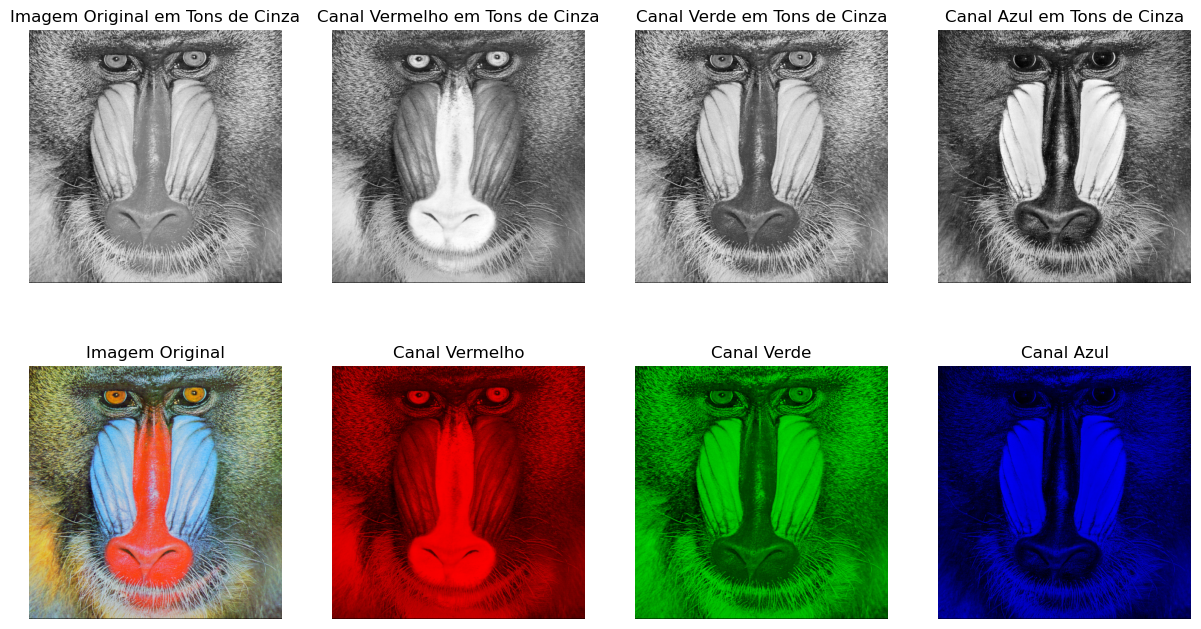

In [65]:
# carregar a imagem e mudar o formato para RGB
img = cv2.imread('baboon.png')
imagem = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Separar os canais de cor da imagem
(canalVermelho, canalVerde, canalAzul) = cv2.split(imagem)

# Visualizar o canal de cor na sua respectiva cor
zeros = np.zeros(imagem.shape[:2], dtype = "uint8")
img_CanalVermelho = cv2.merge([canalVermelho,zeros, zeros])
img_CanalVerde = cv2.merge([zeros, canalVerde, zeros])
img_CanalAzul = cv2.merge([zeros, zeros, canalAzul])

# Visualizar as imagens em níveis de cinza e em níveis da cor da sua respectiva banda
imagens = [(cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)), canalVermelho, canalVerde, canalAzul, imagem, img_CanalVermelho, img_CanalVerde, img_CanalAzul]
cores = ["gray", "gray", "gray", "gray", "gray", "Reds", "Greens", "Blues"]
titulos = ["Imagem Original em Tons de Cinza", "Canal Vermelho em Tons de Cinza", "Canal Verde em Tons de Cinza", "Canal Azul em Tons de Cinza", "Imagem Original", "Canal Vermelho", "Canal Verde", "Canal Azul"]
aux = 0
fig, subimagem = plt.subplots(2, 4, figsize=(15,8))
for i in range(0,2):
    for j in range(0,4):
        produzir_subimagem(subimagem, i, j, imagens[aux], cores[aux], titulos[aux])
        aux += 1
plt.show()

Agora que a imagem está carregada no programa, foi realizada a segmentação de cada canal de cor em planos de bits. Sabe-se que cada banda da imagem carrega o valor da intensidade $i$ do pixel naquele plano, em que $i = \{i \in \Z | 0 \leq i \leq 255 \}$. Esse valor é representado por meio de um byte, ou seja, para o valor $i = 115$ teremos o binário $01110011$ associado. O acesso a um bit específico é efetuado por meio dos operadores bitwise '\&' e '$\gt \gt$'. Primeiro é aplicado o operador AND no valor $i$ com a string binária de zeros com o valor $1$ encontra-se na posição do bit desejado, obtendo uma nova string binária com o bit desejado. Por exemplo, para o número $155$ e o desejo de acessar o segundo bit mais significativo, teremos $01110011  \&  01000000 \rarr 01000000$. Por fim, é preciso realizar um deslocamento do bit desejado para a posição menos significativa. Seguindo o exemplo anterior, arrastamos o segundo bit mais significativo para o bit menos significativo, ou seja, $01000000 \gt \gt 6 \rarr 00000001$. 

Realizado este procedimento em cada pixel daquele canal de cor, é possível construir uma nova imagem binária associada a um plano de bits. O trecho de código abaixo ilustra a obtenção dos oito plano de bits para cada banda; em seguida, é representada a imagem binária resultante. É possível perceber a quantidade de informação que cada plano de bits carrega, sendo os bits mais significativos com mais informações e os menos significativas com menos informação. A partir disso, é possível entender que para realizar o processo de esteganografia, é interessante realizar o ocultamento da mensagem nos bits menos significativos (bits 0, 1 e 2) uma vez que não causará alterações perceptíveis na imagem final.

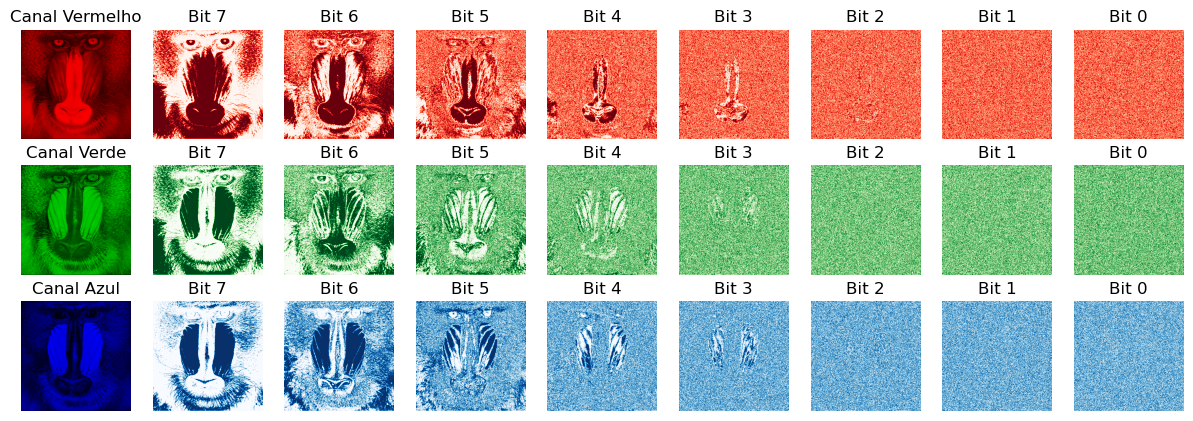

In [66]:
# Produção das imagens de cada plano de bits de cada canal de cor
operation = [0b10000000, 0b01000000, 0b00100000, 0b00010000, 0b00001000, 0b00000100, 0b00000010, 0b00000001]
imagens = []
for i in range(0,3):
    for j in range(0,8):
        match i:
            case 0:
                imagens.append((canalVermelho & operation[j]) >> (7-j))
            case 1:
                imagens.append((canalVerde & operation[j]) >> (7-j))
            case 2:
                imagens.append((canalAzul & operation[j]) >> (7-j))

# Plotagem das imagens de cada plano de bits de cada canal de cor
titulos = ["","Bit 7", "Bit 6", "Bit 5", "Bit 4", "Bit 3", "Bit 2", "Bit 1", "Bit 0"]
aux = 1
fig, subimagem = plt.subplots(3, 9, figsize=(15,5))
for i in range(0,3):
    for j in range(0,9):
        match i:
            case 0:
                if j == 0:
                    produzir_subimagem(subimagem, 0, 0, img_CanalVermelho, "Reds", "Canal Vermelho")
                else:
                    produzir_subimagem(subimagem, i, j, imagens[aux-1], "Reds", titulos[j])
                    aux += 1
            case 1:
                if j == 0:
                    produzir_subimagem(subimagem, 1, 0, img_CanalVerde, "Greens", "Canal Verde")
                else:
                    produzir_subimagem(subimagem, i, j, imagens[aux-1], "Greens", titulos[j])
                    aux += 1
            case 2:
                if j == 0:
                    produzir_subimagem(subimagem, 2, 0, img_CanalAzul, "Blues", "Canal Azul")
                else:
                    produzir_subimagem(subimagem, i, j, imagens[aux-1], "Blues", titulos[j])
                    aux += 1
                    
plt.show()

### Manipulação do texto

O próximo processo que o programa de esteganografia deverá realizar está relacionado com a manipulação da mensagem que será ocultada. As mensagens são entendidas como um vetor de caracteres, comumente denominadas de *strings*. Os caracteres passam por um processo de codificação que os converte em números inteiros e, em seguida, o computador os representa de forma binária. Há um padrão para realizar esta representação de símbolos em valores que é o Unicode, projetado com base no código ASCII. O Unicode permite mapear um caractere usando de um a quatro *bytes* de armazenamento (máximo de 32 *bits*). 

A partir do entendimento de como as letras são representadas pelo computador, é possível realizar a codifição de uma mensagem qualquer em binário para que a mesma possa ser inserida em uma imagem futuramente. Para isso, o primeiro passo consiste em abrir um arquivo texto e armazenagem a mensagem que será convertida por meio da função `open()` e `read()` (abrir o arquivo no modo leitura e ler/armazenar o conteúdo contido nele). Em seguida, o texto lido estará no formato *string* e será preciso convertê-lo para o código Unicode associado. A função `ord()` realizará este procedimento, então, por exemplo, o caractere 'A' será convertido para o valor Unicode $65$. Por fim, deverá converter o inteiro para o binário. Isso pode ser facilmente obtido utilizando a função `bin()`, a qual retorna de 1 a 4 *bytes*. Para evitar complicações futuras, é desejado que todos os caracteres tenham o mesmo tamanho de 4 *bytes*. Sendo assim, a conversão para binário precisa de outra estratégia. Diante disso, após obter o valor associado aquele caractere, foi feita a operação AND deste valor com o número 1. Por exemplo, o caracter 'A' cujo valor é $65=01000001$, ao realizar a operação de AND, será obtido o valor do último bit, que no caso é $1$. Este valor será armazenado em outra variável e o número $65$ sofrerá um deslocamento, obtendo $00100000$, e novamente é extraído o último *bit*. Esse procedimento será realizado a quantidade de *bits* necessárias, que no caso será $32$, para que todos os caracteres ocupem $4$ *bytes*. O último detalhe que deve ser levado em conta será a necessidade de inverter a *string*. Usando o mesmo exemplo anterior, teríamos como resultado o valor binário $10000010.00000000.00000000.00000000$, invertendo-o teremos $00000000.00000000.00000000.01000001$, logo o número $65$ terá, de forma explícita, $4$ *bytes*.

O trecho de código a seguir realiza o procedimento explicado acima, desde a abertura do arquivo, extração da mensagem completa, conversão de cada caractere para o padrão Unicode e conversão para binário. A partir disso é obtido um vetor com a mensagem inteira no formato binário.

In [67]:
# Abertura do arquivo e exibição da frase que será manipulada
arq = open("frase.txt", "r")
frase = arq.read()
arq.close()
print("Frase original de tamanho",len(frase), ":", frase)

# Inicialização do vetor que armazenará a frase criptografada com tamanho igual a len(frase)*32 (4 bytes por caractere)
frase_binaria = np.zeros(4*8*len(frase), dtype=int)

# Conversão da frase para binário
position = 0
for caractere in frase:
    caractere_unicode = ord(caractere)
    for i in range(32):
       bit = caractere_unicode & 1
       frase_binaria[position] = bit
       position = position + 1 
       caractere_unicode = caractere_unicode >> 1
frase_binaria = frase_binaria[::-1]
       
# Exibição da frase em binário
print("Frase em binário de tamanho", len(frase_binaria), ":", frase_binaria)

Frase original de tamanho 71 : "A maneira de começar é parar de falar e começar a fazer." -Walt Disney
Frase em binário de tamanho 2272 : [0 0 0 ... 0 1 0]


Agora que a frase está expressa no formato binário e cada caractere ocupa $4$ *bytes*, é desejado desfazer o processo para obter a frase original. Para converter do binário para cada um dos caracteres deveremos ler a frase em binário num intervalo de 32 *bits*. Em seguida foi feito um deslocamento para a esquerda, ou seja, estaremos multiplicando por $2$ cada *bit* e em seguida é somado com os *bits* restantes da frase binária. Após realizar este cálculo para todos os 32 *bits* de cada caractere, foi convertido o valor obtido para o caractere Unicode associado. E no final também será necessário inverter a *string* obtida para obter a frase original. Como exemplo considere o binário $00000000.00000000.00000000.01000001$, como este contém apenas 32 *bits*, então será convertido para um único caractere. Após $25$ iterações deslocando e somando $0$, chegamos no *bit* $1$ que será deslocado, obtendo $10$ e isso será feito mais $5$ vezes, obtendo $100000$, ao encontrar o próximo *bit* $1$ será somado, resultando em $1000001$. Como passou por todos os *bits*, é obtido o número $65$ que representa o caractere 'A'. 

In [68]:
# Crianção do vetor que conterá a frase original
frase_original = ""

# Conversão da frase binária para a frase original
for caractere_bin in range(0, len(frase_binaria), 32):
    caractere_unicode = 0
    for bit in range(32):
        caractere_unicode = caractere_unicode << 1
        caractere_unicode += frase_binaria[caractere_bin + bit]
    frase_original = frase_original + chr(caractere_unicode)
frase_original = frase_original[::-1]

# Exibição da frase original
print("Frase original de tamanho", len(frase_original), ":", frase_original)

Frase original de tamanho 71 : "A maneira de começar é parar de falar e começar a fazer." -Walt Disney


## Codificação

A partir das observações feitas anteriormente, o método de codificação realizado neste trabalho será feito nos *bits* menos significativos de cada canal de cor da imagem (*bits* 0, 1 e 2). Desta forma, ao inserir o texto na imagem, não será percebido que a mesma foi alterada.

Para auxiliar o processo de codificação, alguns métodos foram definidos, sendo eles:

- `transformar_texto_binario()`: A inserção de um texto em uma imagem é facilitada por meio da representação deste em formato binário. Diante disso, a presente função realiza tal procedimento por meio da conversão de cada caractere para o seu respectivo valor Unicode, seguida da transformação para binário. Para facilitar no processo de decodificação, cada caractere ocupará 32 *bits*.
- `assinar`: Para saber o ponto de parada do texto no processo de decodificação foi necessário inserir uma assinatura ao final da mensagem, que no caso será a *string* "#####". Esta função realiza este processo por meio da conversão para binário da assinatura concatenada a mensagem que será ocultada.
- `codificar`: Núcleo central do processo de codificação. Esta função realiza todos os processos, iniciando com a conversão da mensagem para binário seguida da assinatura da mesma. Também é feito uma verificação para saber se imagem suporta a mensagem no caso do usuário escolher todos os planos de bits menos significativos (caso extremo). Por fim, seguindo a ordem do plano de bits definida pelo usuário, foi realizada a substituição dos *bits* do plano da imagem pela mensagem. A lógica deste processo consiste em transformar a imagem num grande vetor, em que a cada trio de valores reresenta um pixel da imagem, cujo valor sofrerá um AND com 254, 253 e 251 para selecionar o *bit* que será modificado (*bits* 0, 1 ou 2 menos significativos, respectivamente). Após esta operação, será realizado um OR com o bit da mensagem deslocado para a posição do *bit* que será alterado da imagem, inserindo desta forma a mensagem na imagem. Um detalhe a ser observado consiste na inserção da mensagem, em que primeiramente será alterado um plano de bits por completo e se não couber seguirá para o próximo até chegar no final da mensagem. 


In [69]:
def transformar_texto_binario(mensagem: str):
    mensagem_binaria = np.zeros(4*8*len(mensagem), dtype=int)
    pos = 0
    for caractere in mensagem:
        caractere_unicode = ord(caractere)                          # converter o caractere para o código unicode
        for i in range(32):
            a = (caractere_unicode & 1)
            mensagem_binaria[pos] = a
            pos += 1
            caractere_unicode = caractere_unicode >> 1   
    mensagem_binaria = mensagem_binaria[::-1]  
    return mensagem_binaria

In [70]:
def assinar(texto_binario: np.ndarray):
    assinatura = "#####"
    assinatura = transformar_texto_binario(assinatura)
    texto_assinado = np.concatenate([texto_binario, assinatura], axis=None)
    return texto_assinado

In [71]:
# Função que realiza o processo de esteganografia
def codificar(imagem: np.ndarray, texto: str, plano_bits: np.ndarray):
   
   #Converter o texto em binário e adicionar a assinatura no final
   texto_binario = transformar_texto_binario(texto)
   texto_binario_assinado = assinar(texto_binario)
   
   qtd_bits_texto = len(texto_binario_assinado)          # Quantidade de bits do texto com assinatura
   qtd_bits_imagem = len(imagem)*len(imagem[0])*3*8      # Quantidade de bits da imagem M*N*3 canais*8 bits
   vetor_imagem = imagem.flatten()                       # Transforma a imagem em um vetor
   pos_bit_texto = 0                                     # Posição do bit do texto
   
   # Caso a imagem não suporte o texto
   if qtd_bits_texto > qtd_bits_imagem:
      print("O seu texto é maior que a imagem.\nTexto de", qtd_bits_texto, "bits e imagem de", qtd_bits_imagem, "bits.")
      return None
   
   # Inserção do texto na imagem seguindo a ordem do plano de bits que foi informado
   for plano in plano_bits:
      match plano:
         case 0:
            for valor in range(len(vetor_imagem)):
               if pos_bit_texto == qtd_bits_texto:
                  break
               vetor_imagem[valor] = (vetor_imagem[valor] & 0b11111110) | (texto_binario_assinado[pos_bit_texto] << 0)
               pos_bit_texto += 1
         case 1:
            for valor in range(len(vetor_imagem)):
               if pos_bit_texto == qtd_bits_texto:
                  break
               vetor_imagem[valor] = (vetor_imagem[valor] & 0b11111101) | (texto_binario_assinado[pos_bit_texto] << 1)
               pos_bit_texto += 1
         case 2:
            for valor in range(len(vetor_imagem)):
               if pos_bit_texto == qtd_bits_texto:
                  break
               vetor_imagem[valor] = (vetor_imagem[valor] & 0b11111011) | (texto_binario_assinado[pos_bit_texto] << 2)
               pos_bit_texto += 1
   
   imagem_codificada = vetor_imagem.reshape(imagem.shape)
   return imagem_codificada

Para testar a codificação, foi carregada a imagem *peppers.png* e o texto *doctor_who.txt* (roteiro de um episódio da série Doctor Who). Além disso, foi escolhida que a mensagem seria adicionada nos planos de bits 0, 1 e 2. Após a codificação, é mostrada como a imagem era originalmente e como ela ficou após inserir a mensagem, perceba-se que não é possível notas diferença entre as duas imagens.

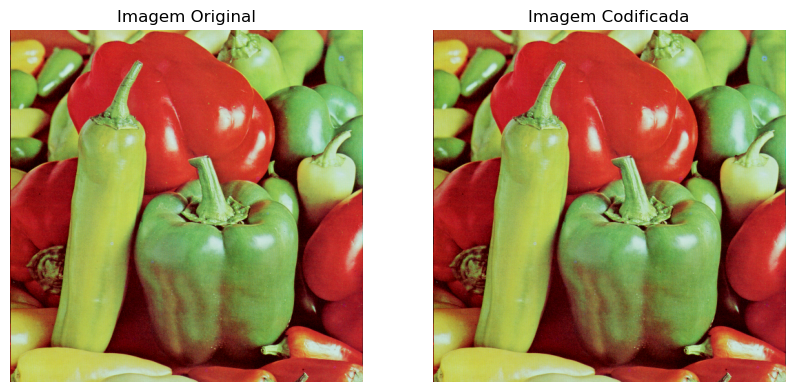

In [72]:
# Carregamento da imagem e conversão para RGB
imagem = cv2.imread("peppers.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB) 

# Abrir o arquivo de texto que será codificado
texto = open("doctor_who.txt", "r").read()

# Selecionar o plano de bits
plano_bits = np.array([0,1,2])

# Codificar o texto na imagem
imagem_codificada = codificar(imagem, texto, plano_bits)

# Mostrar a imagem codificada
fig, subimagem = plt.subplots(1, 2, figsize=(10, 10))
subimagem[0].imshow(imagem)
subimagem[0].set_title("Imagem Original")
subimagem[0].axis('off')
subimagem[1].imshow(imagem_codificada)
subimagem[1].set_title("Imagem Codificada")
subimagem[1].axis('off')
plt.show()

Para observar a diferença entre as imagens original e codificada é preciso observar o plano de *bits* de cada uma delas. A célula a seguir realiza a separação das bandas da imagem e posteriormente mostra os planos de *bits* 7, 2, 1 e 0 de cada banda. Desta forma, é possível observar que as bandas menos significativas da imagem codificada aparecem no formato de listras enquanto que na original é apenas ruído, em que carrega pouca informação da imagem original. Repare que as listras estão bem espaçadas pois a representação de cada caractere da mensagem usa 32 *bits*, sendo assim, há muitos 0 nas partes mais significativas. Outro ponto importante a ser observado diz respeito sobre o ponto em que a mensagem termina na imagem, isso é observado no plano de *bit* 1, pois há uma mudança abrupta da padronização de listras para o ruído da imagem original.

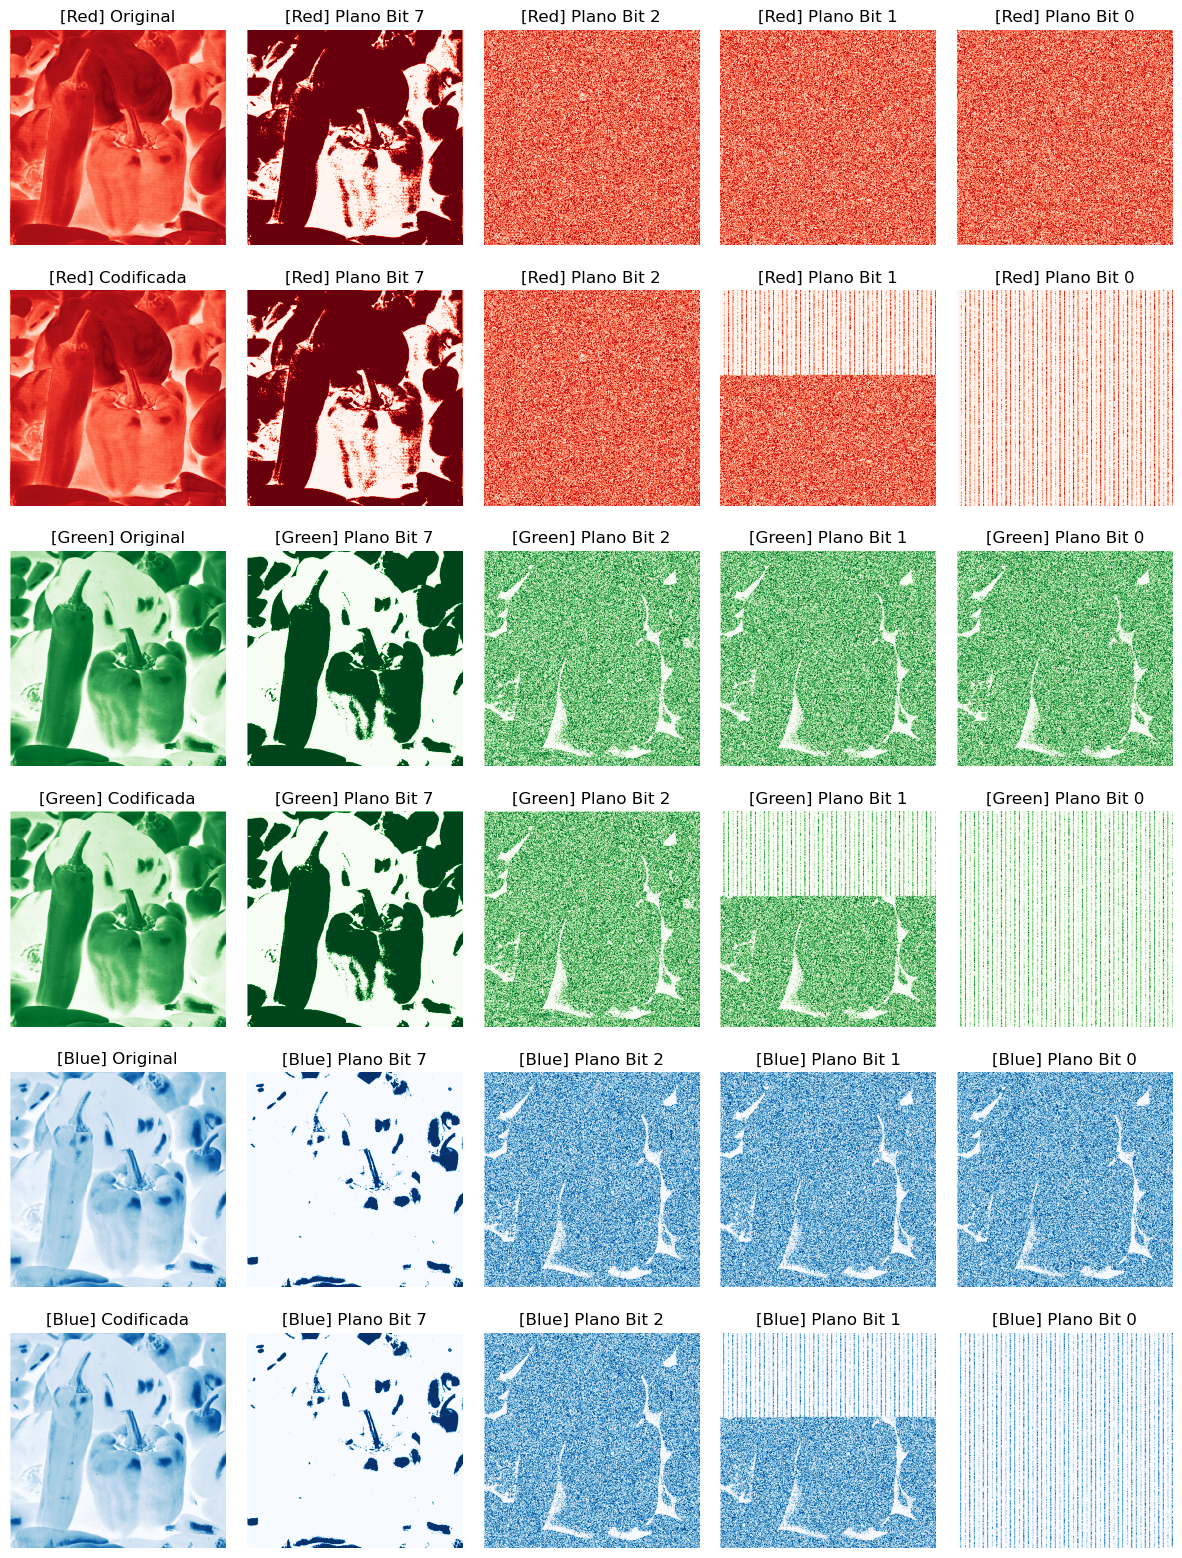

In [73]:
# Separar os canais de cor da imagem original e da imagem codificada
(canalVermelho_original, canalVerde_original, canalAzul_original) = cv2.split(imagem)
(canalVermelho_codificado, canalVerde_codificado, canalAzul_codificado) = cv2.split(imagem_codificada)

# Montar as subimagens para visualização
fig, subimagem = plt.subplots(6, 5, figsize=(15, 20))
produzir_subimagem(subimagem,0,0, canalVermelho_original, "Reds", "[Red] Original")
produzir_subimagem(subimagem,0,1, (canalVermelho_original & 0b10000000) >> 7 ,"Reds", "[Red] Plano Bit 7")
produzir_subimagem(subimagem,0,2, (canalVermelho_original & 0b00000100) >> 2, "Reds", "[Red] Plano Bit 2")
produzir_subimagem(subimagem,0,3, (canalVermelho_original & 0b00000010) >> 1, "Reds", "[Red] Plano Bit 1")
produzir_subimagem(subimagem,0,4, (canalVermelho_original & 0b00000001) >> 0, "Reds", "[Red] Plano Bit 0")

produzir_subimagem(subimagem,1,0, canalVermelho_codificado, "Reds", "[Red] Codificada")
produzir_subimagem(subimagem,1,1, (canalVermelho_codificado & 0b10000000) >> 7, "Reds", "[Red] Plano Bit 7")   
produzir_subimagem(subimagem,1,2, (canalVermelho_codificado & 0b00000100) >> 2, "Reds", "[Red] Plano Bit 2")
produzir_subimagem(subimagem,1,3, (canalVermelho_codificado & 0b00000010) >> 1, "Reds", "[Red] Plano Bit 1")
produzir_subimagem(subimagem,1,4, (canalVermelho_codificado & 0b00000001) >> 0, "Reds", "[Red] Plano Bit 0")

produzir_subimagem(subimagem,2,0, canalVerde_original, "Greens", "[Green] Original")
produzir_subimagem(subimagem,2,1, (canalVerde_original & 0b10000000) >> 7, "Greens", "[Green] Plano Bit 7")
produzir_subimagem(subimagem,2,2, (canalVerde_original & 0b00000100) >> 2, "Greens", "[Green] Plano Bit 2")
produzir_subimagem(subimagem,2,3, (canalVerde_original & 0b00000010) >> 1, "Greens", "[Green] Plano Bit 1")
produzir_subimagem(subimagem,2,4, (canalVerde_original & 0b00000001) >> 0, "Greens", "[Green] Plano Bit 0")

produzir_subimagem(subimagem,3,0, canalVerde_codificado, "Greens", "[Green] Codificada")
produzir_subimagem(subimagem,3,1, (canalVerde_codificado & 0b10000000) >> 7, "Greens", "[Green] Plano Bit 7")
produzir_subimagem(subimagem,3,2, (canalVerde_codificado & 0b00000100) >> 2, "Greens", "[Green] Plano Bit 2")
produzir_subimagem(subimagem,3,3, (canalVerde_codificado & 0b00000010) >> 1, "Greens", "[Green] Plano Bit 1")
produzir_subimagem(subimagem,3,4, (canalVerde_codificado & 0b00000001) >> 0, "Greens", "[Green] Plano Bit 0")

produzir_subimagem(subimagem,4,0, canalAzul_original, "Blues", "[Blue] Original")
produzir_subimagem(subimagem,4,1, (canalAzul_original & 0b10000000) >> 7, "Blues", "[Blue] Plano Bit 7")
produzir_subimagem(subimagem,4,2, (canalAzul_original & 0b00000100) >> 2, "Blues", "[Blue] Plano Bit 2")
produzir_subimagem(subimagem,4,3, (canalAzul_original & 0b00000010) >> 1, "Blues", "[Blue] Plano Bit 1")
produzir_subimagem(subimagem,4,4, (canalAzul_original & 0b00000001) >> 0, "Blues", "[Blue] Plano Bit 0")

produzir_subimagem(subimagem,5,0, canalAzul_codificado, "Blues", "[Blue] Codificada")
produzir_subimagem(subimagem,5,1, (canalAzul_codificado & 0b10000000) >> 7, "Blues", "[Blue] Plano Bit 7")
produzir_subimagem(subimagem,5,2, (canalAzul_codificado & 0b00000100) >> 2, "Blues", "[Blue] Plano Bit 2")
produzir_subimagem(subimagem,5,3, (canalAzul_codificado & 0b00000010) >> 1, "Blues", "[Blue] Plano Bit 1")
produzir_subimagem(subimagem,5,4, (canalAzul_codificado & 0b00000001) >> 0, "Blues", "[Blue] Plano Bit 0")

# Ajustar o espaçamento entre as subimagens e mostrar
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

É possível escolher qualquer ordem de inserção nos planos de *bits* 0, 1 e 2 juntamente com variações deste, ou seja, escolher todos os três ou menos. Ao mudar a ordem, é possível observar que o preenchimento da mensagem na imagem também muda, uma vez que será feito o preenchimento do primeiro plano de forma completa antes de ir para o próximo. Além disso, o texto `doctor_who_duplicado.txt`, ao selecionar os três planos menos significativos, é possível observar que os planos 0 e 1 serão preenchidos de forma completa, enquanto que o plano 2 conterá o restante da mensagem.

## Decodificação

Todo o processo de esteganografia precisa, além de codificar, remover a mensagem inserida na imagem usando a lógica inversa da codificação. Assim como no passo anterior, alguns métodos foram definidos para tornar a implementação mais simples, estes métodos são:

- `converter_binario_caractere`: Esta função recebe uma cadeia de 32 *bits*, a converte para o valor inteiro e depois pega o caractere o qual aquele valor é associado. 
- `extrair_texto`: Dado um plano de *bits*, este método irá extrair o texto presente naquele plano e irá finalizar a operação até encontrar os caracteres associados a assinatura definida durante o processo de codificação. 
- `decodificar`: Núcleo central do processo de decodificação. Dada uma imagem codificada e o plano de *bits* utilizado para a codificação, esta função fatia os planos da imagem e em seguida realiza a extração da *string* contida naquele plano até encontrar a assinatura que indica o término da mensagem. Por fim, concatena as *strings* de cada plano, inverte a mensagem, uma vez que esta estará ao contrário, e por fim, remove a assinatura. 

In [74]:
def converter_binario_caractere(caractere_binario: np.ndarray):
    caractere = ""
    c_bin = 0
    for j in range(32):
        c_bin = c_bin << 1
        c_bin += caractere_binario[j]
    caractere = chr(c_bin)
    return caractere

In [75]:
def extrair_texto(vetor_binario_plano: np.ndarray, texto: str, flag: bool):
    assinatura = ""
    for i in range(0, len(vetor_binario_plano), 32):
        caractere_binario = vetor_binario_plano[i:i+32]
        caractere = converter_binario_caractere(caractere_binario)
        if(caractere == "#"):
            caractere_binario = vetor_binario_plano[i:i+32]
            caractere = converter_binario_caractere(caractere_binario)
            assinatura += caractere
        if(assinatura == "#####"):
            flag = True
            return texto, flag
        texto+=caractere
    return texto, flag

In [76]:
def decodificar(imagem_codificada: np.ndarray, plano_bits: np.ndarray):   
    imagem_codificada_vetor = imagem_codificada.flatten()
    texto, texto_plano0, texto_plano1, texto_plano2 = "", "", "", ""
    flag = False

    for plano in plano_bits:
        match plano:
            case 0:
                vetor_binario_plano = (imagem_codificada_vetor & 1) >> 0
                texto_plano0, flag = extrair_texto(vetor_binario_plano, texto, flag)
            case 1:
                vetor_binario_plano = (imagem_codificada_vetor & 2) >> 1
                texto_plano1, flag = extrair_texto(vetor_binario_plano, texto, flag)
            case 2:
                vetor_binario_plano = (imagem_codificada_vetor & 4) >> 2
                texto_plano2, flag = extrair_texto(vetor_binario_plano, texto, flag)
        if flag == True:
            break
            
    texto = texto_plano0 + texto_plano1 + texto_plano2      # Concatenar os textos extraídos de cada planos de bits
    texto = texto[::-1]                                     # Inverter o texto extraído
    texto = texto[4::]                                      # Remover a assinatura
    return texto

Após a definição da decodificação e suas funções auxiliares, a célula abaixo realiza a extração da mensagem a partir da imagem codificada anteriormente. Com isso, é obtido a mensagem original, que é o roteiro do seriado codificado inicialmente.

In [77]:
plano_bits = np.array([0, 1, 2])
texto_extraido = decodificar(imagem_codificada, plano_bits)
print(texto_extraido)

[Palace of Versailles]
(18th Century France, and the guests at a masked ball are running along corridors and screaming in terror. In a royal bedroom is an ornate clock with a smashed glass face. A woman stands in front of the fireplace. We're back at Tredegar already.)
LOUIS: We are under attack! There are creatures I don't even think they're human. We can't stop them.
REINETTE: The clock is broken. He's coming.
LOUIS: Did you hear what I said?
REINETTE: Listen to me. There is a man coming to Versailles. He has watched over me my whole life and he will not desert me tonight.
LOUIS: What are you talking about? What man?
REINETTE: The only man, save you, I have ever loved. No, don't look like that, there's no time. You have your duties. I am your mistress. Go to your queen.
(Reinette calls into the fireplace.)
REINETTE: Are you there? Can you hear me? I need you now. You promised. The clock on the mantel is broken. It is time. Doctor! Doctor!

[Spaceship]

(Three thousand years later, th

## Discussões Finais

Este trabalho apresentou o processo de esteganografia em imagens digitais. Nele foi possível observar como a quantidade de informação varia em cada plano de *bits*, entender algumas operações simples sobre a imagem e como é possível guardar não apenas texto, mas qualquer arquivo, basta encontrar uma forma de representá-lo de forma binária.

Ainda há melhorias a serem feitas neste projeto, como o uso de técnicas de vetorização para otimizar o código e tornar o processo de codificação mais rápido. Quanto a lógica, seria interessante adicionar um cabeçalho  mensagem no momento que for inserí-la na imagem, uma vez que é possível saber se a imagem contém ou não uma mensagem oculta além do tamanho da mesma. Outra adição importante ao programa diz respeito ao plano de *bits*, aumentando as escolhas possíveis de alteração além de tentar outras técnicas de conversão para binário a fim de ocupar menos espaço e por consequência, inserir mensagens cada vez maiores. Por fim, há algumas simplicações possíveis de serem feitas para tornar o programa mais simples e modularizado.

Entretando, mesmo com as diversas melhorias que podem ser adicionadas, o presente trabalho ilustra o processo de esteganografia de maneira simplificada em conjunto com manipulações de *bits* em imagens digitais, auxiliando o entendimento para projetos futuros.